#1. Loading data

In [ ]:
import pandas as pd

In [ ]:
from google.colab import files
files.upload()

Saving encoded.xlsx to encoded.xlsx


{'encoded.xlsx': b'PK\x03\x04\x14\x00\x00\x00\x08\x00g\x8d\x84P\x1f#\xcf\x03\xc0\x00\x00\x00\x13\x02\x00\x00\x0b\x00\x00\x00_rels/.rels\xad\x92O\x8b\xc2@\x0c\xc5\xbfJ\x99\xfb\x1aW\xc1\xc3b=y\xe9mY\xfc\x02q&\xfdC;\x93!\x13\xb1~{\x87\xbdl\xb7TP\xf0\x18^\xf2\xde\x8fG\xf6?4\xa0v\x1cR\xdb\xc5T\x8c~\x08\xa94\xadj\xfc\x02H\xb6%\x8fi\xc5\x91BVj\x16\x8f\x9aGi \xa2\xed\xb1!\xd8\xac\xd7;\x90\xa9\x879\xec\xa7\x9eE\xe5J#\x95\xfb4\xc5\t\xa5!-\xcd8\xc0\x95\xa5?3\xf7\xabl\x9b\x85[\xa4gB\xb9\xae;KG\xb6\x17OA\x17\xb2g\x1b\x06\x96Y6\x7f,\x8e\xed\xb7p\xbe\xb4,\xf4\x1a\xcd\xe3\n\xc0\x93\xa2C\xc5_\xd7\x8f\x98\x03H\xb4\xa3\xf4\x08h\xbb\x00\x841\xbe\xbb\x1d\x1a\x95\x82#7#\x82\x7f?p\xb8\x03PK\x03\x04\x14\x00\x00\x00\x08\x00g\x8d\x84P\'\xe8\x87\x0e\x82\x00\x00\x00\xb1\x00\x00\x00\x10\x00\x00\x00docProps/app.xmlM\x8eM\x0b\xc20\x10D\xffJ\xe9\xddn)\xe8Ab@\xb0G\xc1\x93\xf7\x90nl \xc9\x86\xcd\n\xf9\xf9\xa6\x82\x1f\xb7y\xbca\x18uc\xca\xc8\xe2\xb1t5\x86TN\xfd*\x92\x8f\x00\xc5\xae\x18M\x19\x9aN\xcd8\xe2h\xa4!?\x80\x9c\

In [ ]:
data=pd.read_excel('encoded.xlsx')

In [ ]:
data.head(2)

,Unnamed: 0,Age,gender_code,Door to needle time,CODING WINDOW,NIHSS on admission,Hyper tension,DM,Blood Sugar at the time of admission (mg/dl),blood sugar_code,LARGE Vs SMALL ARTERY,Dose of Actilyse/ Weight(in gms),NIHSS after 1 hr,NIHSS after 6 hrs,OTHER CO- MORBIDITY,ADDICTION,CODE SMOKER,History of Stroke,systolic,diastolic,door-door time_code_1.0,door-door time_code_2.0,door-door time_code_3.0,door-door time_code_4.0,door-door time_code_5.0,door-door time_code_6.0,age_codes_2.0,age_codes_3.0,age_codes_4.0,age_codes_5.0,age_codes_6.0,age_codes_7.0,age_codes_8.0,age_codes_9.0,Neurological Deficit_code _1.0,Neurological Deficit_code _2.0,Neurological Deficit_code _3.0,Neurological Deficit_code _4.0,Neurological Deficit_code _5.0,NIHSS admission_code_0.0,...,NIHSS admission_code_2.0,NIHSS admission_code_3.0,NIHSS admission_code_4.0,NIHSS admission_code_5.0,MRS_0.0,MRS_1.0,MRS_2.0,MRS_3.0,MRS_4.0,MRS_5.0,blood pressure_code_1.0,blood pressure_code_2.0,blood pressure_code_3.0,CODING ANT. POST. COMBINATION_1.0,CODING ANT. POST. COMBINATION_2.0,CODING ANT. POST. COMBINATION_3.0,HAGE_1.0,HAGE_2.0,HAGE_3.0,NIHSS on discharge/MRS_codes_improved or not_1.0,NIHSS on discharge/MRS_codes_improved or not_2.0,NIHSS on discharge/MRS_codes_improved or not_3.0,complications_code_1.0,complications_code_2.0,complications_code_3.0,outcome_1.0,outcome_2.0,outcome_3.0,outcome_4.0,2D ECHO_1.0,2D ECHO_2.0,2D ECHO_3.0,2D ECHO_4.0,MRA (BRAIN/NECK)_1.0,MRA (BRAIN/NECK)_2.0,MRA (BRAIN/NECK)_3.0,CAROTID DOPPLER _1.0,CAROTID DOPPLER _2.0,CAROTID DOPPLER _3.0,CAROTID DOPPLER _4.0
0,0,65.0,1.0,20.0,1.0,14.0,1.0,1.0,484.0,1.0,1.0,0.045,12.0,10.0,NaN,NaN,0.0,0.0,150.0,80.0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,38.0,1.0,30.0,1.0,13.0,0.0,0.0,95.0,0.0,0.0,0.050,10.0,10.0,NaN,NaN,1.0,0.0,130.0,80.0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
data=data.drop(columns=['Unnamed: 0'],axis=1)

Whether to normalize or standardize ->normalization is sensitive to outliers; standardization enables us to do multivariate analysis 

Leave the dosage column as of now; some discrepency occured 

#2. Check for outliers etc by plots

In [ ]:
data.columns

Index(['Age', 'gender_code', 'Door to needle time ', 'CODING WINDOW ',
       'NIHSS on admission', 'Hyper tension ', 'DM',
       'Blood Sugar at the time of admission (mg/dl)', 'blood sugar_code',
       'LARGE Vs SMALL ARTERY', ' Dose of Actilyse/ Weight(in gms)',
       'NIHSS after 1 hr', '  NIHSS after 6 hrs', 'OTHER CO- MORBIDITY',
       'ADDICTION', 'CODE SMOKER ', 'History of Stroke', 'systolic',
       'diastolic', 'door-door time_code_1.0', 'door-door time_code_2.0',
       'door-door time_code_3.0', 'door-door time_code_4.0',
       'door-door time_code_5.0', 'door-door time_code_6.0', 'age_codes_2.0',
       'age_codes_3.0', 'age_codes_4.0', 'age_codes_5.0', 'age_codes_6.0',
       'age_codes_7.0', 'age_codes_8.0', 'age_codes_9.0',
       'Neurological Deficit_code _1.0', 'Neurological Deficit_code _2.0',
       'Neurological Deficit_code _3.0', 'Neurological Deficit_code _4.0',
       'Neurological Deficit_code _5.0', 'NIHSS admission_code_0.0',
       'NIHSS admission_c

In [ ]:
#outliers can't be neglected as per that day's meeting!!
#and also lay emphasis on the "door to door time"
import seaborn as sns
import matplotlib.pyplot as plt

ERROR! Session/line number was not unique in database. History logging moved to new session 59


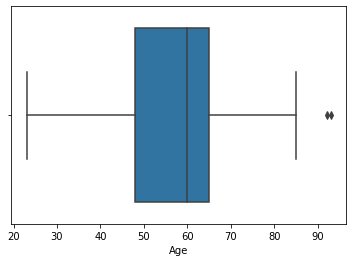

In [ ]:
sns.boxplot(x='Age',data=data)

In [ ]:
#without enumerate onlylast plot would be plotted 
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.countplot(x=col, data=data)

In [ ]:
for i, col in enumerate(data.columns):
    plt.figure(i)
    sns.boxplot(x=col, data=data)

Before applying any scaling transformations it is very important to split your data into a train set and a test set.If you start scaling before, your training (and test) data might end up scaled around a mean value (see below) that is not actually the mean of the train or test data, and go past the whole reason why you’re scaling in the first place.[link text](https://towardsdatascience.com/preprocessing-with-sklearn-a-complete-and-comprehensive-guide-670cb98fcfb9)

Normalize :def normalize_ignore_null(df):
    return (df - df.min()) * 1.0 / (df.max() - df.min())

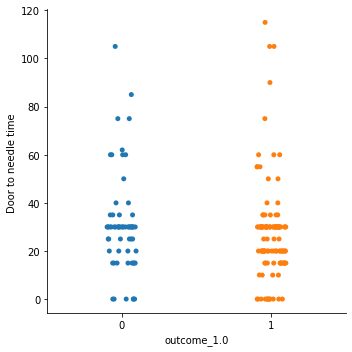

In [ ]:
import seaborn as sns
sns.catplot(y='Door to needle time ',x='outcome_1.0',data=data)

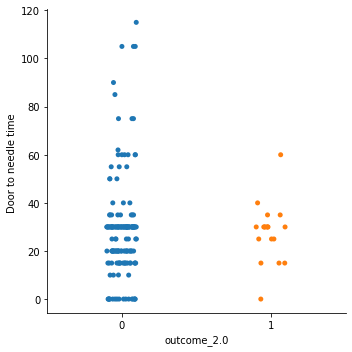

In [ ]:
sns.catplot(y='Door to needle time ',x='outcome_2.0',data=data)

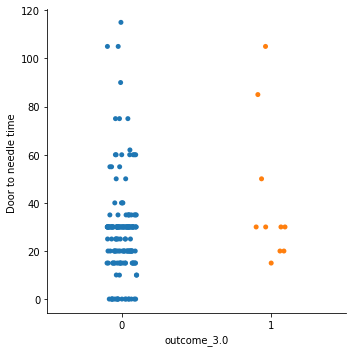

In [ ]:
sns.catplot(y='Door to needle time ',x='outcome_3.0',data=data)

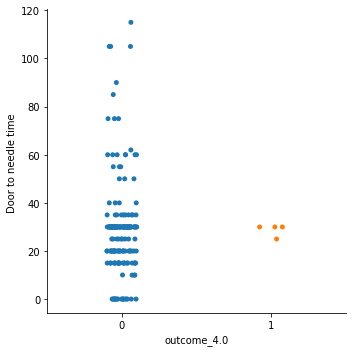

In [ ]:
sns.catplot(y='Door to needle time ',x='outcome_4.0',data=data)

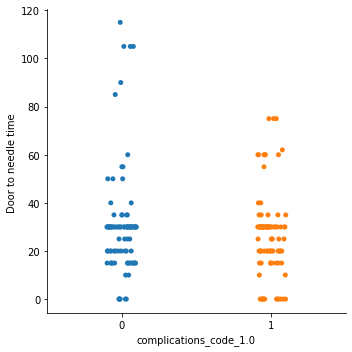

In [ ]:
sns.catplot(y='Door to needle time ',x='complications_code_1.0',data=data)

In [ ]:
data.columns

Index(['Age', 'gender_code', 'Door to needle time ', 'CODING WINDOW ',
       'NIHSS on admission', 'Hyper tension ', 'DM',
       'Blood Sugar at the time of admission (mg/dl)', 'blood sugar_code',
       'LARGE Vs SMALL ARTERY', ' Dose of Actilyse/ Weight(in gms)',
       'NIHSS after 1 hr', '  NIHSS after 6 hrs', 'OTHER CO- MORBIDITY',
       'ADDICTION', 'CODE SMOKER ', 'History of Stroke', 'systolic',
       'diastolic', 'door-door time_code_1.0', 'door-door time_code_2.0',
       'door-door time_code_3.0', 'door-door time_code_4.0',
       'door-door time_code_5.0', 'door-door time_code_6.0', 'age_codes_2.0',
       'age_codes_3.0', 'age_codes_4.0', 'age_codes_5.0', 'age_codes_6.0',
       'age_codes_7.0', 'age_codes_8.0', 'age_codes_9.0',
       'Neurological Deficit_code _1.0', 'Neurological Deficit_code _2.0',
       'Neurological Deficit_code _3.0', 'Neurological Deficit_code _4.0',
       'Neurological Deficit_code _5.0', 'NIHSS admission_code_0.0',
       'NIHSS admission_c

#3. Missing values 

In [ ]:
def missing_values_table(df):
  # Total missing values
  mis_val = df.isnull().sum()
  
  # Percentage of missing values
  mis_val_percent = 100 * df.isnull().sum() / len(df)
  
  # Make a table with the results
  mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)
  
  # Rename the columns
  mis_val_table_ren_columns = mis_val_table.rename(
  columns = {0 : 'Missing Values', 1 : '% of Total Values'})
  
  # Sort the table by percentage of missing descending
  mis_val_table_ren_columns = mis_val_table_ren_columns[
      mis_val_table_ren_columns.iloc[:,1] != 0].sort_values(
  '% of Total Values', ascending=False).round(1)
  
  # Print some summary information
  print ("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"      
      "There are " + str(mis_val_table_ren_columns.shape[0]) +
        " columns that have missing values.")
  
  # Return the dataframe with missing information
  return mis_val_table_ren_columns

In [ ]:
missing_values_table(data)

Your selected dataframe has 80 columns.
There are 19 columns that have missing values.


,Missing Values,% of Total Values
LARGE Vs SMALL ARTERY,88,47.1
OTHER CO- MORBIDITY,65,34.8
ADDICTION,58,31.0
NIHSS after 1 hr,9,4.8
NIHSS after 6 hrs,7,3.7
Dose of Actilyse/ Weight(in gms),4,2.1
CODE SMOKER,3,1.6
gender_code,3,1.6
systolic,2,1.1
History of Stroke,2,1.1


In [ ]:
data.columns

Index(['Age', 'gender_code', 'Door to needle time ', 'CODING WINDOW ',
       'NIHSS on admission', 'Hyper tension ', 'DM',
       'Blood Sugar at the time of admission (mg/dl)', 'blood sugar_code',
       'LARGE Vs SMALL ARTERY', ' Dose of Actilyse/ Weight(in gms)',
       'NIHSS after 1 hr', '  NIHSS after 6 hrs', 'OTHER CO- MORBIDITY',
       'ADDICTION', 'CODE SMOKER ', 'History of Stroke', 'systolic',
       'diastolic', 'door-door time_code_1.0', 'door-door time_code_2.0',
       'door-door time_code_3.0', 'door-door time_code_4.0',
       'door-door time_code_5.0', 'door-door time_code_6.0', 'age_codes_2.0',
       'age_codes_3.0', 'age_codes_4.0', 'age_codes_5.0', 'age_codes_6.0',
       'age_codes_7.0', 'age_codes_8.0', 'age_codes_9.0',
       'Neurological Deficit_code _1.0', 'Neurological Deficit_code _2.0',
       'Neurological Deficit_code _3.0', 'Neurological Deficit_code _4.0',
       'Neurological Deficit_code _5.0', 'NIHSS admission_code_0.0',
       'NIHSS admission_c

In [ ]:
df=data.copy()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

missing_df = df.isnull().sum(axis=0).reset_index()
missing_df.columns = ['column_name', 'missing_count']
missing_df = missing_df.loc[missing_df['missing_count']>0]
missing_df = missing_df.sort_values(by='missing_count')

ind = np.arange(missing_df.shape[0])
width = 0.2
fig, ax = plt.subplots(figsize=(5,10))
rects = ax.barh(ind, missing_df.missing_count.values, color='red')
ax.set_yticks(ind)
ax.set_yticklabels(missing_df.column_name.values, rotation='horizontal')
ax.set_xlabel("Count of missing values")
ax.set_title("Number of missing values in each column")
plt.show()

The mean of the numerical column data is used to replace null values when the data is normally distributed. Median is used if the data comprised of outliers. Mode is used when the data having more occurences of a particular value or more frequent value.

In [ ]:
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


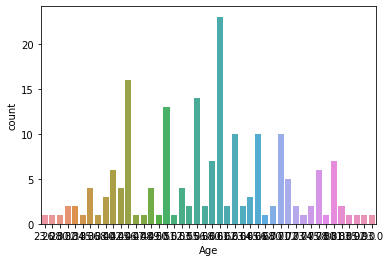

In [ ]:
sns.countplot(x='Age',data=data)

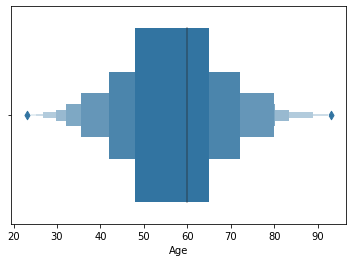

In [ ]:
sns.boxenplot(x='Age',data=data)

In [ ]:
#as per meeting - outliers are imp; so would take up median to fill values in age column

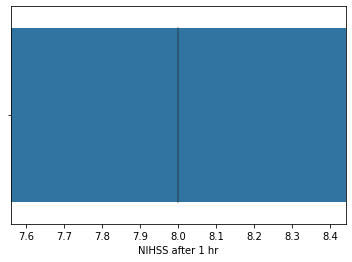

In [ ]:
sns.boxenplot(x='NIHSS after 1 hr',data=data)

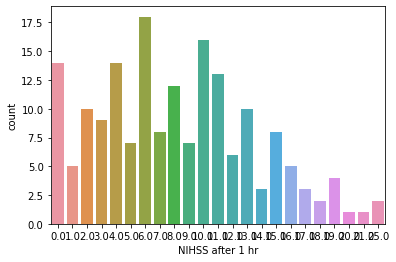

In [ ]:
sns.countplot(x='NIHSS after 1 hr',data=data)

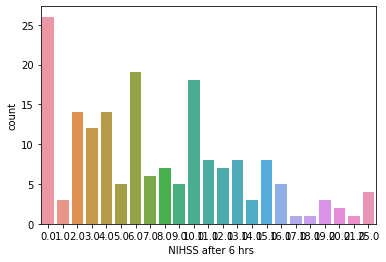

In [ ]:
sns.countplot(x='  NIHSS after 6 hrs',data=data)

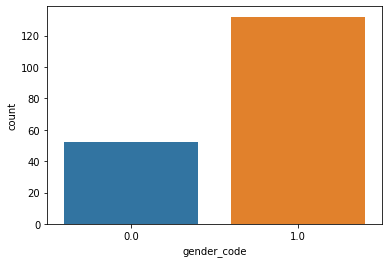

In [ ]:
sns.countplot(x='gender_code',data=data)

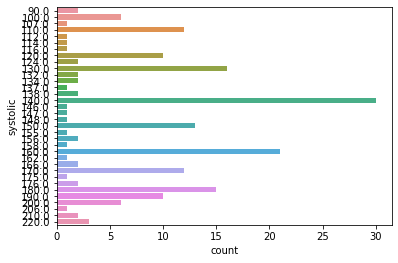

In [ ]:
sns.countplot(y='systolic',data=data, )

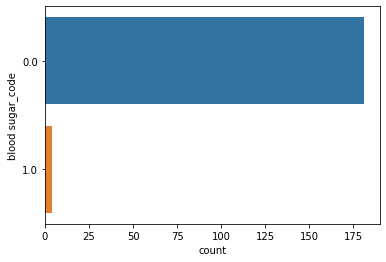

In [ ]:
sns.countplot(y='blood sugar_code',data=data)

ERROR! Session/line number was not unique in database. History logging moved to new session 63


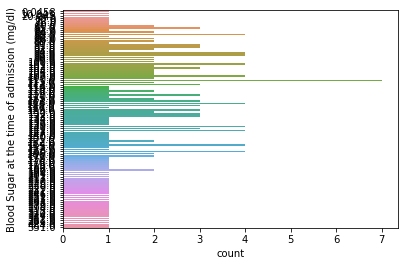

In [ ]:
sns.countplot(y='Blood Sugar at the time of admission (mg/dl)'	,data=data)

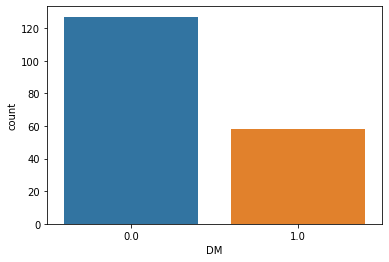

In [ ]:
sns.countplot(x='DM'	,data=data)

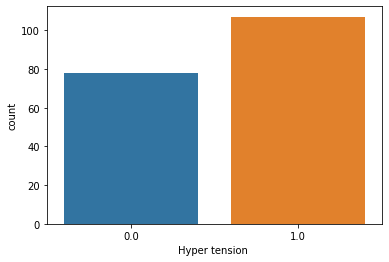

In [ ]:
sns.countplot(x='Hyper tension '	,data=data)

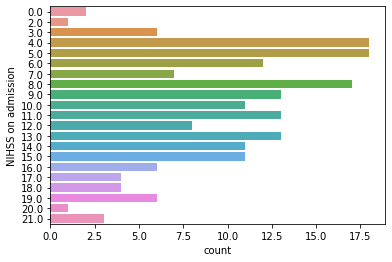

In [ ]:
sns.countplot(y='NIHSS on admission'	,data=data)

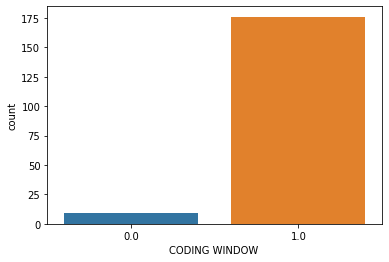

In [ ]:
sns.countplot(x='CODING WINDOW ',data=data)

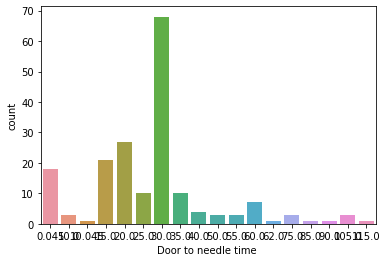

In [ ]:
sns.countplot(x='Door to needle time ',data=data)

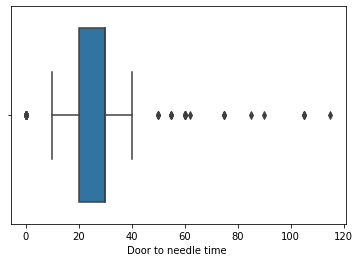

In [ ]:
sns.boxplot(x='Door to needle time ',data=data)

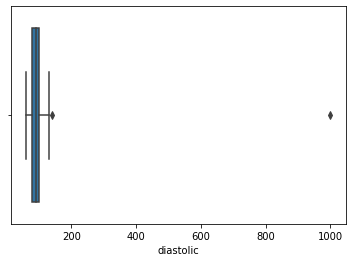

In [ ]:
sns.boxplot(x='diastolic',data=data)

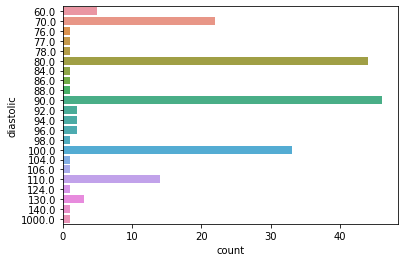

In [ ]:
sns.countplot(y='diastolic',data=data)

#4. Filling NULL values

In [ ]:
fdf=data.copy() #fill the null values in fdf -> the copy of data dataset


###1.Normalize and then mean/median/mode


In [ ]:
import matplotlib.pyplot as plt
from sklearn import preprocessing 
import seaborn as sns


# to normalize
def normalize(df,col):
  
  x = df[col].values.astype(float)
  min_max_scaler = preprocessing.MinMaxScaler()
  x_scaled = min_max_scaler.fit_transform(x)
  df_normalized = pd.DataFrame(x_scaled)
  df[col]=df_normalized[0]

#to print no. of null values
def nul(df,col):
    print("no. of null values",df[col].isnull().sum())

# to plot the count
def plots(df,col):
  plt.figure()
  sns.countplot(y=col,data=df)

#to fill or replace null values with mean,median or mode
def normalize_then(df,col,cplot,x):  #x=1 mean, 2 median , 3 mode
  print("before")
  nul(df,col)

  plots(df,cplot)

  normalize(df,col)

  plots(df,cplot)

  if(x==1):
    df[col]=df[col].fillna(df[col].mean())
    nul(df,col)
  elif(x==2):
    df[col]=df[col].fillna(df[col].median())
    nul(df,col)
  elif(x==3):
    df[col]=df[col].fillna(df[col].mode())
    nul(df,col)


* Nihss after 1 hr - normalize and then mean DONE
* Nihss after 6 hrs - “ “
* Systolic - normalize and then mean replace
* Blood sugar at admission, mg/ -> normalize and mean
* Nihss on admission -> normalize and then mean
* Door to needle time-> normalize and mean as outliers are very important in it
* Diastolic -> normalize and mean


before
no. of null values Age    0
dtype: int64
no. of null values Age    0
dtype: int64


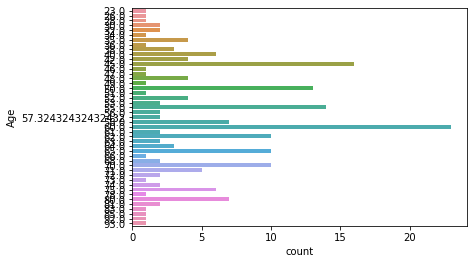

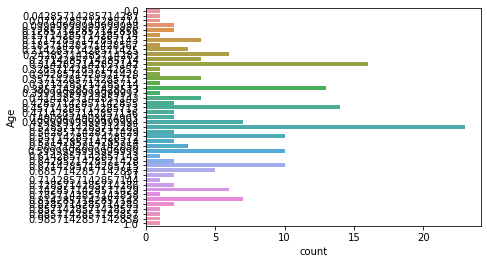

In [ ]:
normalize_then(fdf,['Age'],'Age',2) #age for median

before
no. of null values NIHSS after 1 hr    9
dtype: int64
no. of null values NIHSS after 1 hr    0
dtype: int64


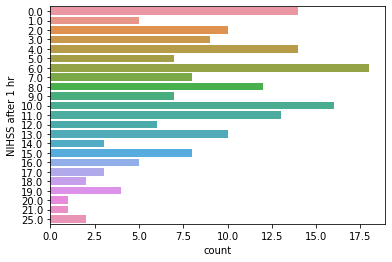

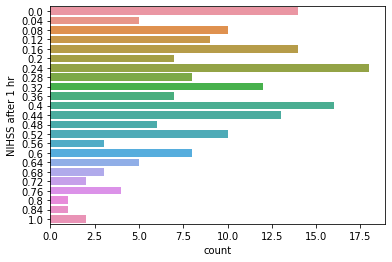

In [ ]:
normalize_then(fdf,['NIHSS after 1 hr'],'NIHSS after 1 hr',1)

before
no. of null values   NIHSS after 6 hrs    7
dtype: int64
no. of null values   NIHSS after 6 hrs    0
dtype: int64


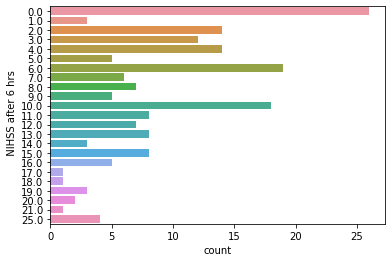

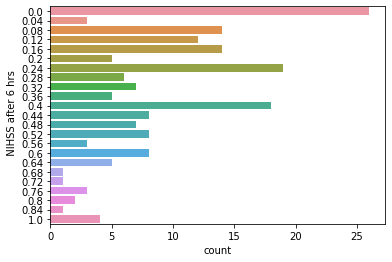

In [ ]:
normalize_then(fdf,['  NIHSS after 6 hrs'],'  NIHSS after 6 hrs',1)

before
no. of null values systolic    2
dtype: int64
no. of null values systolic    0
dtype: int64


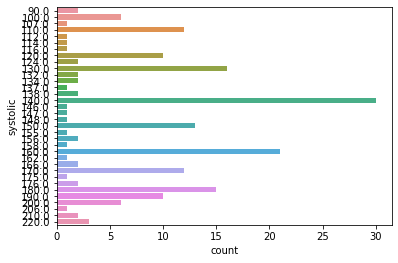

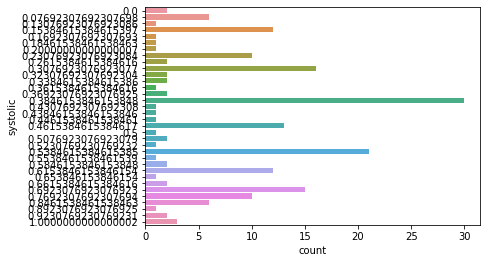

In [ ]:
normalize_then(fdf,['systolic'],'systolic',1)

before
no. of null values Blood Sugar at the time of admission (mg/dl)    2
dtype: int64
no. of null values Blood Sugar at the time of admission (mg/dl)    0
dtype: int64


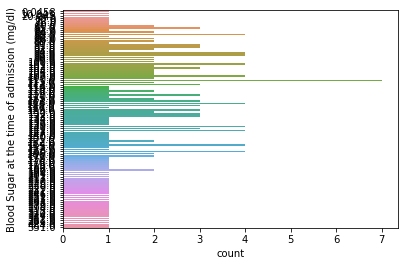

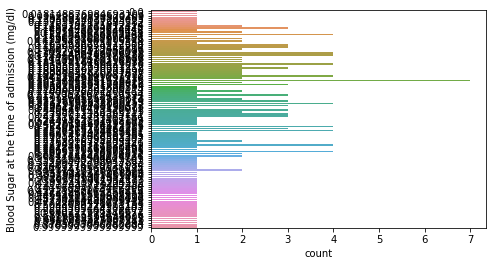

In [ ]:
normalize_then(fdf,['Blood Sugar at the time of admission (mg/dl)'],'Blood Sugar at the time of admission (mg/dl)',1)

before
no. of null values NIHSS on admission    2
dtype: int64
no. of null values NIHSS on admission    0
dtype: int64


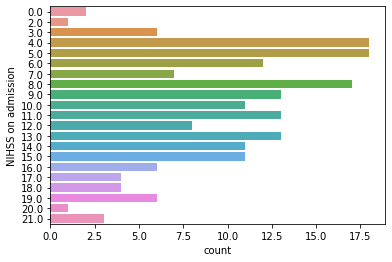

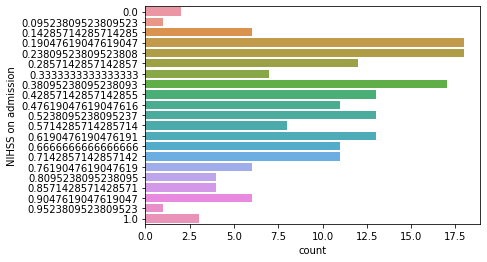

In [ ]:
normalize_then(fdf,['NIHSS on admission'],'NIHSS on admission',1)

before
no. of null values Door to needle time     2
dtype: int64
no. of null values Door to needle time     0
dtype: int64


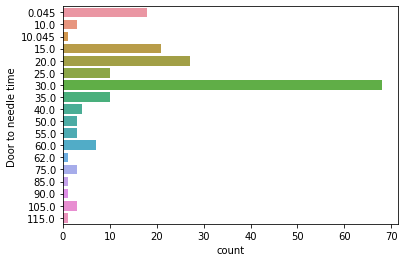

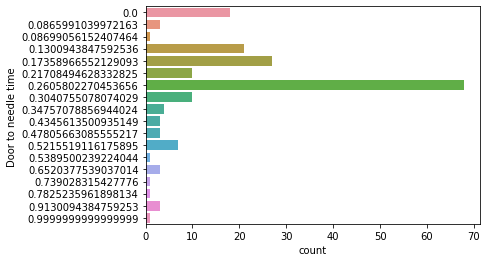

In [ ]:
normalize_then(fdf,['Door to needle time '],'Door to needle time ',1)

before
no. of null values diastolic    2
dtype: int64
no. of null values diastolic    0
dtype: int64


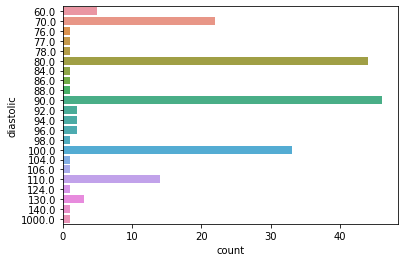

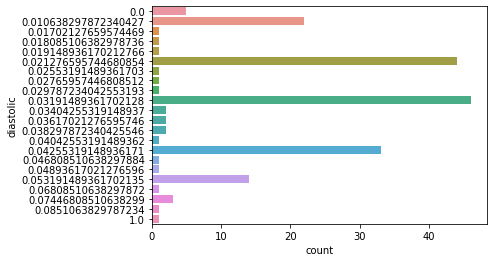

In [ ]:
normalize_then(fdf,['diastolic'],'diastolic',1)

###2. Replace with median/mode/mean/some value

In [ ]:
def replc(df,col,x):
  print("before")
  nul(df,col)
  if(x==1):
    k=df[col].mean()
  if(x==2):
    k=df[col].median()
  if(x==3):
    k=df[col].mode()
  if(x==4):
    num=input("input the value")
    k=num
  df[col]=df[col].fillna(k)
  nul(df,col)



* Age- use median since outliers are there DONE
* Code smoker- I will replace missing values with 1(yes that person smokes)
* Gender code with mode-> 1
* History of stroke-> will replace with “yes’ i.e. 1
* Blood sugar code-> with 0 (mode)
* DM -> will consider “yes” i.e. 1
* Hyper tension-> yes ; 1 
* Coding window-> 1 (mode)


In [ ]:
replc(fdf,['Age'],1)

before
no. of null values Age    2
dtype: int64
ERROR! Session/line number was not unique in database. History logging moved to new session 63
no. of null values Age    0
dtype: int64


In [ ]:
replc(fdf,['CODE SMOKER '],4) #input 1

before
no. of null values CODE SMOKER     3
dtype: int64
input the value1
no. of null values CODE SMOKER     0
dtype: int64


In [ ]:
replc(fdf,['gender_code'],4) #input 1

before
no. of null values gender_code    3
dtype: int64
input the value1
no. of null values gender_code    0
dtype: int64


In [ ]:
replc(fdf,['History of Stroke'],4) #input 1

before
no. of null values History of Stroke    2
dtype: int64
input the value1
no. of null values History of Stroke    0
dtype: int64


In [ ]:
replc(fdf,['blood sugar_code'],4) #input 1

before
no. of null values blood sugar_code    2
dtype: int64
input the value0
no. of null values blood sugar_code    0
dtype: int64


In [ ]:
replc(fdf,['DM'],4) #input 1

before
no. of null values DM    2
dtype: int64
input the value1
no. of null values DM    0
dtype: int64


In [ ]:
replc(fdf,['Hyper tension '],4) #input 1

before
no. of null values Hyper tension     2
dtype: int64
input the value1
no. of null values Hyper tension     0
dtype: int64


In [ ]:
replc(fdf,['CODING WINDOW '],4) #input 1

before
no. of null values CODING WINDOW     2
dtype: int64
input the value1
no. of null values CODING WINDOW     0
dtype: int64


#5. Export data to excel sheet

In [ ]:
fdf.to_excel('fillednull1.xlsx',sheet_name='Sheet1')

In [ ]:
from google.colab import files
files.download("fillednull1.xlsx")